In [128]:
import openslide as op
import matplotlib.pyplot as plt
import numpy as np

In [129]:
file = 'TCGA-BH-A18P-01Z-00-DX1.C66642D3-BE44-4D65-B4AE-C1C3D959D22C.svs'
wsi = op.OpenSlide(file)
wsi_dim = wsi.dimensions
lvl = wsi.level_dimensions
print('dim =', wsi_dim)
print('level =', lvl)

dim = (100546, 91125)
level = ((100546, 91125), (25136, 22781), (6284, 5695), (3142, 2847))


In [130]:
dwn_sample = wsi.level_downsamples
print(dwn_sample)

(1.0, 4.000061731691996, 16.00059811587213, 32.004006361347905)


In [131]:
prop=wsi.properties
print(prop)

<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'resc3-dsr2', 'aperio.Date': '06/08/11', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-BH-A18P-01Z-00-DX1', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '67769', 'aperio.Left': '32.335846', 'aperio.LineAreaXOffset': '-0.014041', 'aperio.LineAreaYOffset': '0.000544', 'aperio.LineCameraSkew': '0.000833', 'aperio.MPP': '0.2485', 'aperio.OriginalHeight': '91225', 'aperio.OriginalWidth': '105000', 'aperio.Parmset': 'GOG136 on RESBPCLACIE01', 'aperio.ScanScope ID': 'SS1436CNTLR', 'aperio.StripeWidth': '1000', 'aperio.Time': '21:20:46', 'aperio.Time Zone': 'GMT-04:00', 'aperio.Title': 'TCGA-BH-A18P-01Z-00-DX1', 'aperio.Top': '23.566174', 'aperio.User': 'b9274770-b4f1-4e45-9bd8-06b7f9a3ac7d', 'openslide.comment': 'Aperio Image Library v10.2.41\r\n105000x91225 [0,100 100546x91125] (256x256) JPEG/RGB Q=30|AppMag = 40|Stri

In [132]:
print(float(wsi.properties[op.PROPERTY_NAME_OBJECTIVE_POWER]))

40.0


In [160]:
mpp_x = float(wsi.properties.get('openslide.mpp-x', '0'))
mpp_y = float(wsi.properties.get('openslide.mpp-y', '0'))

# if mpp_x == 0 or mpp_y == 0:
#     print("Microns per pixel information not available.")
# else:
#     print(f"Level 0 - Microns per pixel (X): {mpp_x}")
#     print(f"Level 0 - Microns per pixel (Y): {mpp_y}")

    # Calculate microns per pixel for each level
num_levels = wsi.level_count

for level in range(num_levels):
    downsample = wsi.level_downsamples[level]
    level_mpp_x = mpp_x * downsample
    level_mpp_y = mpp_y * downsample
    print(f"Level {level} - Microns per pixel (X): {level_mpp_x}")
    print(f"Level {level} - Microns per pixel (Y): {level_mpp_y}")    

Level 0 - Microns per pixel (X): 0.2485
Level 0 - Microns per pixel (Y): 0.2485
Level 1 - Microns per pixel (X): 0.9940153403254611
Level 1 - Microns per pixel (Y): 0.9940153403254611
Level 2 - Microns per pixel (X): 3.9761486317942243
Level 2 - Microns per pixel (Y): 3.9761486317942243
Level 3 - Microns per pixel (X): 7.952995580794954
Level 3 - Microns per pixel (Y): 7.952995580794954


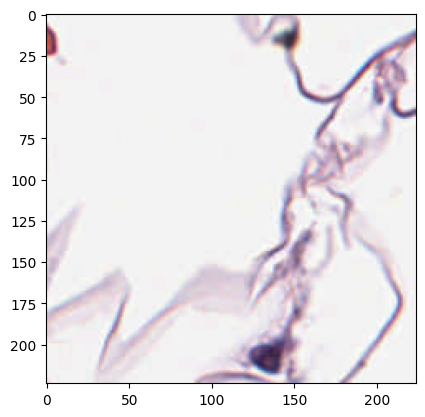

In [133]:
wrr = wsi.read_region((16000,16000),0,(224,224))
wrrtorgb = wrr.convert('RGB')
wrrtorgb.show()
wrrtoarray = np.array(wrrtorgb)    
plt.imshow(wrrtoarray)

In [134]:
bst_dwn = wsi.get_best_level_for_downsample
print(bst_dwn)

<bound method OpenSlide.get_best_level_for_downsample of OpenSlide('TCGA-BH-A18P-01Z-00-DX1.C66642D3-BE44-4D65-B4AE-C1C3D959D22C.svs')>


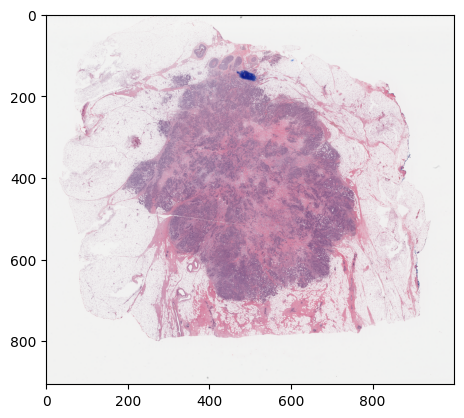

In [135]:
thumb = wsi.get_thumbnail(size=(1000,1000))
plt.imshow(thumb)

In [136]:
from histomicstk.saliency.tissue_detection import get_slide_thumbnail, get_tissue_mask
from PIL import Image
import os 
from matplotlib.colors import ListedColormap

In [137]:
mask_scale = 4
patch_size = 256
slide_id = 'TCGA-A2-A0CL-01Z-00-DX1.5342E971-DCD2-42C4-B4FF-E6942A95829E'
mask_save_dir = 'cool'

In [138]:
print(wsi_dim)

(100546, 91125)


In [139]:
mask_dim = int(wsi_dim[0]*mask_scale/patch_size),int(wsi_dim[1]*mask_scale/patch_size)

In [140]:
image = wsi.get_thumbnail(mask_dim)
#plt.imshow(thumbnail1)

In [141]:
imagearray = np.array(image)
#plt.imshow(thumbnail1array)

In [142]:
labeled, mask = get_tissue_mask(imagearray, deconvolve_first = True, n_thresholding_steps = 1, sigma = 0, min_size = 30) # labeled gives all the tissue regions, mask gives the alrgest tisuue region

In [143]:
#labeled_pool = labeled

In [144]:
#labeled_pool[labeled!=0]=1

In [145]:
# imagearray[labeled_pool==False]=0*imagearray[labeled_pool==False]
# maskrgb=Image.fromarray(imagearray)

In [146]:
# img_path = os.path.join(mask_save_dir, slide_id+'__img.png')
# mask_path = os.path.join(mask_save_dir, slide_id+'__mask.png')
# image.save(img_path)
# maskrgb.save(mask_path)

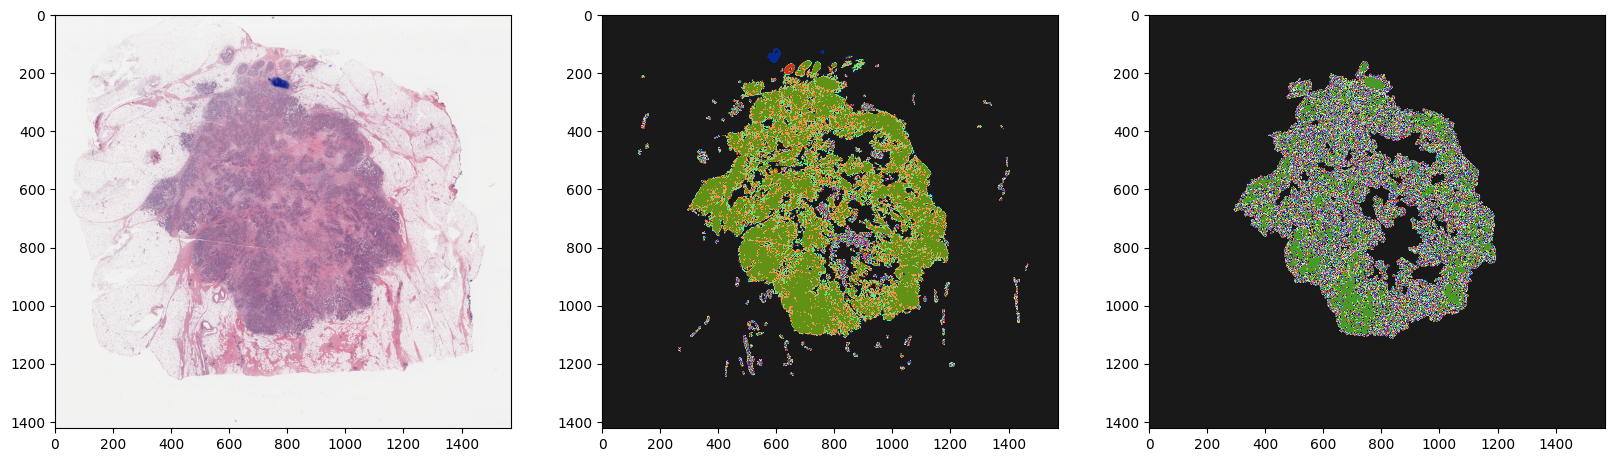

In [147]:
vals = np.random.rand(256,3)
vals[0, ...] = [0.9, 0.9, 0.9]
cMap = ListedColormap(1 - vals)

f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(image)
ax[1].imshow(labeled, cmap=cMap) # all tissue regions
ax[2].imshow(mask, cmap=cMap) # largest tissue region
plt.show()

In [ ]:
###########################################################################################
################## GENERATING PATCHES using mask available for an image ###################
###########################################################################################

In [148]:
# we mul wsi by(4/256=1/64), that means one pixel on mask is 64x64 on wsi. hence patch on mask is 4x4
# and then we mul by 64 in coord then we will get 256x256 patch on wsi
patch_scale=64
patch_size_on_mask= int(mask_scale)
print(f'patch_size on mask : {patch_size_on_mask}')
patch_size_on_wsi= int(patch_scale*mask_scale)
print(f'size of patch on wsi: {patch_size_on_wsi}')
area_threshold=0.8

patch_size on mask : 4
size of patch on wsi: 256


In [149]:
label_bool=labeled
label_bool[labeled!=0]=1

In [150]:
patch_save_dir='cool2'

In [151]:
start_x= np.min(np.nonzero(label_bool)[0])
start_y= np.min(np.nonzero(label_bool)[1])
stop_x= np.max(np.nonzero(label_bool)[0])
stop_y= np.max(np.nonzero(label_bool)[1])
step_size_xy= patch_size_on_mask

In [152]:
print(label_bool)
print(np.sum(label_bool))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
384979


In [153]:
print(np.nonzero(label_bool)[0])

[   9    9    9 ... 1242 1243 1244]


In [154]:
print(np.min(np.nonzero(label_bool)[0]))

9


In [155]:
patch_coord=[]

for y in range(start_y, stop_y, step_size_xy):
    for x in range(start_x, stop_x, step_size_xy):
        arr=label_bool[x:x+patch_size_on_mask, y:y+patch_size_on_mask]
        if np.sum(arr)> area_threshold*(patch_size_on_mask^2) and arr.std()< 32:
            wsi_patch_coord = (y*64,x*64)
            patch_coord.append(wsi_patch_coord)

# print(f' ist element of patch_coord is : {patch_coord[2]}')
total_patches= len(patch_coord)
print(f'no of patches are :{total_patches}')
#print(patch_coord)

no of patches are :29054


In [ ]:
for i in range(total_patches):
#     print(i)
    sample= wsi.read_region(patch_coord[i], 0, (patch_size_on_wsi,patch_size_on_wsi))
    png_file_name = os.path.join(patch_save_dir, slide_id + '__'+ str(patch_coord[i][0])+ '_' + str(patch_coord[i][1]) + '.png')
    sample.save(png_file_name)

In [ ]:
##### color normalization for patches#####

In [ ]:
import glob
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from histomicstk.preprocessing.color_normalization.deconvolution_based_normalization import deconvolution_based_normalization

cn_img_dir='/home/ardhendu/Desktop/cool2_cn/'
W_target = np.array([[0.5807549,  0.08314027,  0.08213795],[0.71681094,  0.90081588,  0.41999816],[0.38588316,  0.42616716, -0.90380025]])
image_list= glob.glob('/home/ardhendu/Desktop/cool2/*.png')

for i in range(len(image_list)):
    image_path= image_list[i]
    
    img = Image.open(image_path)
    img_rgb=img.convert('RGB')
    img_np=np.array(img_rgb)
    img_cn = deconvolution_based_normalization(img_np, W_target=W_target)
    patch_name=image_path.split('/')[-1].split('.')[0]
    name= os.path.join(cn_img_dir,patch_name)
    plt.imsave(name+'_cn.png',img_cn)
    
print(' color normalization is done')  